In [1]:
# Import standard libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# additional supportive li
from statsmodels.tsa.arima.model import ARIMA


In [9]:
# Import .csv
df = pd.read_csv("../../Data/AirQualityUCI.csv", delimiter= ";")

In [10]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [11]:
# Change all ',' to '.' to represent US data standard
df['CO(GT)'] = df['CO(GT)'].str.replace(',', '.')
df['CO(GT)'] = pd.to_numeric(df['CO(GT)'])

df['C6H6(GT)'] = df['C6H6(GT)'].str.replace(',', '.')
df['C6H6(GT)'] = pd.to_numeric(df['C6H6(GT)'])

df['T'] = df['T'].str.replace(',', '.')
df['T'] = pd.to_numeric(df['T'])

df['RH'] = df['RH'].str.replace(',', '.')
df['RH'] = pd.to_numeric(df['RH'])

df['AH'] = df['AH'].str.replace(',', '.')
df['AH'] = pd.to_numeric(df['AH'])

df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [12]:
# Drop unncessessary columns for my portion of the project
df_nick = df.drop(columns=['Unnamed: 15', 'Unnamed: 16', 'C6H6(GT)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)'])
df_nick.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,1046.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,955.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,939.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,948.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,836.0,11.2,59.6,0.7888


In [13]:
# Combine Date time
df_nick["Time"] = df_nick["Time"].str.replace(".", ":", regex=False)
df_nick["Datetime"] = pd.to_datetime(df_nick["Date"] + " " + df_nick["Time"], dayfirst=True)
df_nick = df_nick.set_index("Datetime").sort_index()
df_nick.drop(columns=["Date", "Time"], inplace=True)

df_nick.head()

,CO(GT),PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),T,RH,AH
Datetime,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,150.0,1046.0,13.6,48.9,0.7578
2004-03-10 19:00:00,2.0,1292.0,112.0,955.0,13.3,47.7,0.7255
2004-03-10 20:00:00,2.2,1402.0,88.0,939.0,11.9,54.0,0.7502
2004-03-10 21:00:00,2.2,1376.0,80.0,948.0,11.0,60.0,0.7867
2004-03-10 22:00:00,1.6,1272.0,51.0,836.0,11.2,59.6,0.7888


<Axes: >

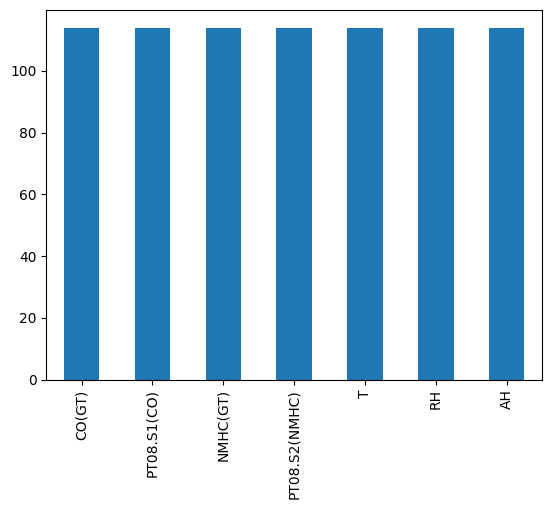

In [14]:
# Check how clean data is
df_nick.isna().sum().plot.bar()

In [15]:
# Clearly there is an actual chunk that is missing from each column

array([<Axes: xlabel='Datetime'>, <Axes: xlabel='Datetime'>,
       <Axes: xlabel='Datetime'>, <Axes: xlabel='Datetime'>,
       <Axes: xlabel='Datetime'>, <Axes: xlabel='Datetime'>,
       <Axes: xlabel='Datetime'>], dtype=object)

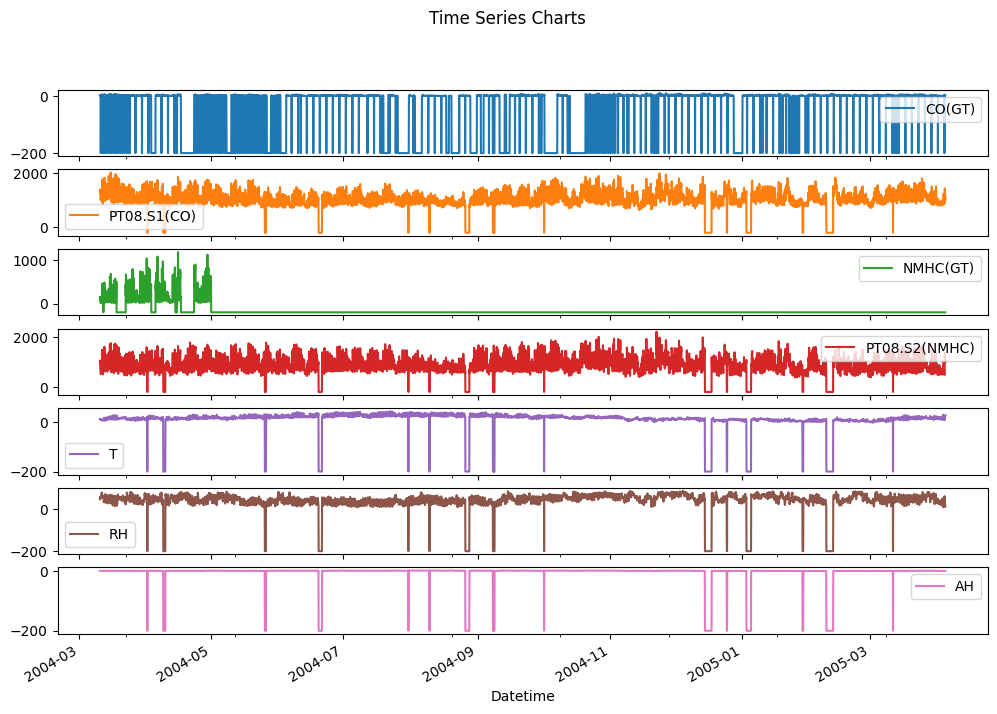

In [16]:
vars_to_plot = [
    "CO(GT)",
    "PT08.S1(CO)",
    "NMHC(GT)",
    "PT08.S2(NMHC)",
    "T",
    "RH",
    "AH"
]

df_nick[vars_to_plot].plot(
    subplots=True,
    figsize=(12, 8),
    title="Time Series Charts"
)

array([<Axes: xlabel='Datetime'>, <Axes: xlabel='Datetime'>,
       <Axes: xlabel='Datetime'>, <Axes: xlabel='Datetime'>,
       <Axes: xlabel='Datetime'>, <Axes: xlabel='Datetime'>,
       <Axes: xlabel='Datetime'>], dtype=object)

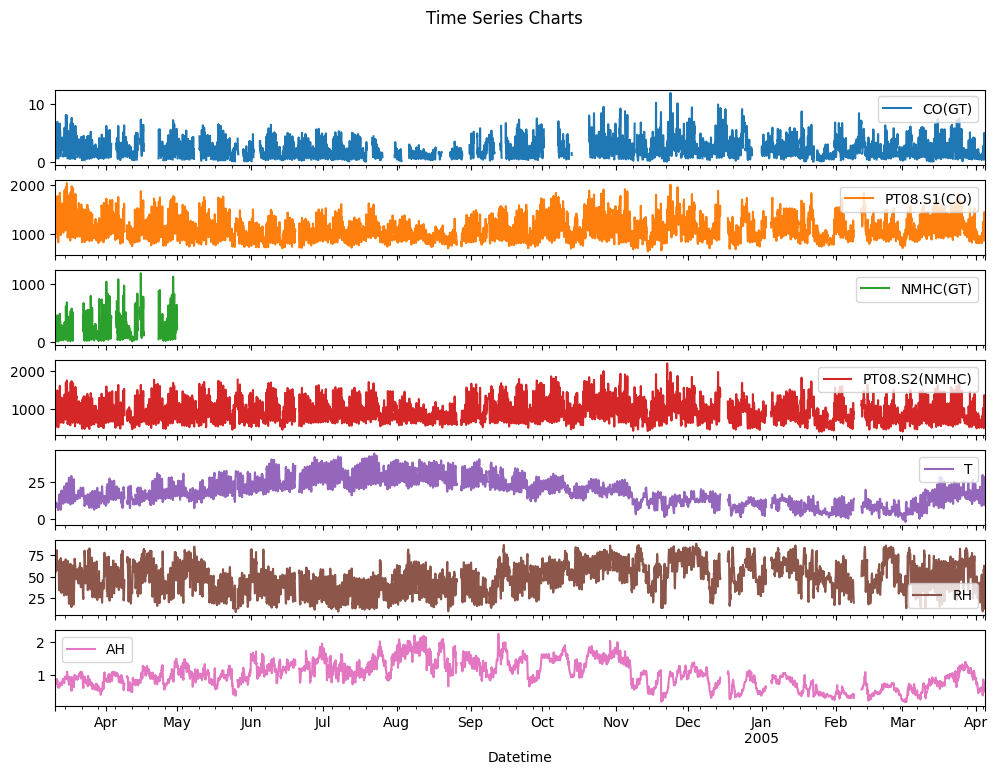

In [17]:
# What is to be expected are all "NaN" areas should be in the same timestamps

# What is interesting is the -200 values. We can consider that as NaN as well
df_nick.replace(-200, np.nan, inplace=True)
df_nick = df_nick[~df_nick.index.isna()]

df_nick[vars_to_plot].plot(
    subplots=True,
    figsize=(12, 8),
    title="Time Series Charts"
)

# What is even more interesting that NMHC(GT) data completely falls off around 2004-05 (year-month)

In [18]:
# Separating the data (Sensor/GT)
df_sensors = df_nick.drop(columns=['CO(GT)', 'NMHC(GT)'])
df_gt = df_nick.drop(columns=['PT08.S1(CO)', 'PT08.S2(NMHC)'])

In [19]:
# Save cleaned data as CSV for later use
# df_clean.to_csv('csv/AirQualityUCI_clean.csv')
# df_gt.to_csv('csv/GT.csv')
# df_sensors.to_csv('csv/sensors.csv')

array([<Axes: xlabel='Datetime'>, <Axes: xlabel='Datetime'>], dtype=object)

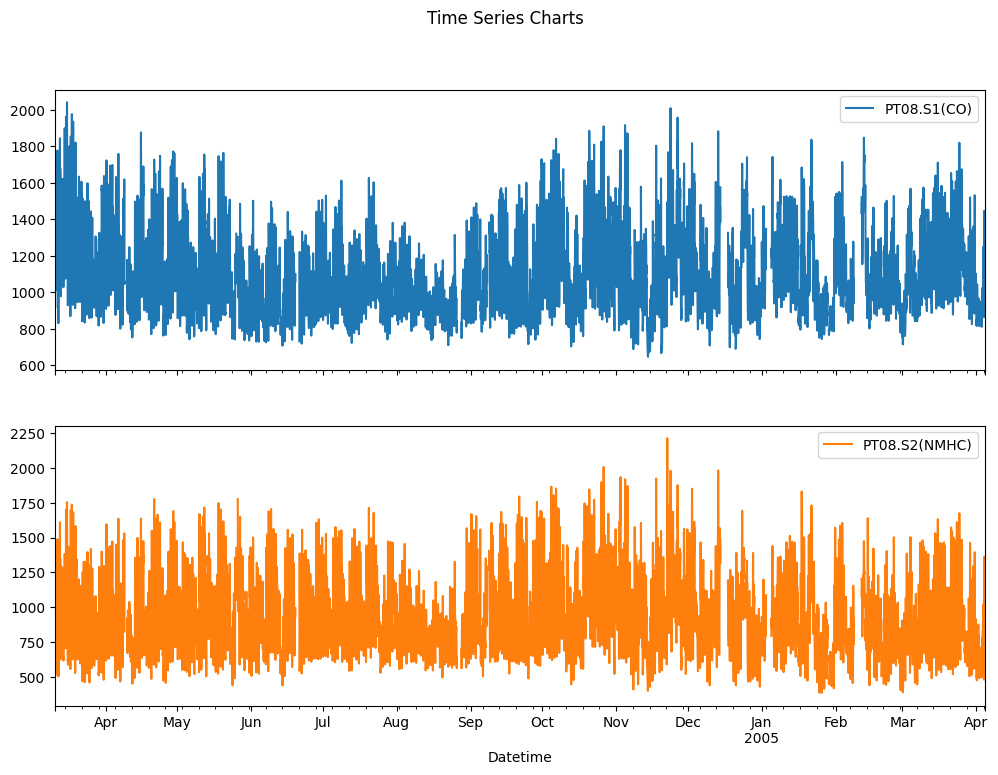

In [20]:
vars_to_plot = [
    "PT08.S1(CO)",
    "PT08.S2(NMHC)"
]

df_sensors[vars_to_plot].plot(
    subplots=True,
    figsize=(12, 8),
    title="Time Series Charts"
)

array([<Axes: xlabel='Datetime'>, <Axes: xlabel='Datetime'>], dtype=object)

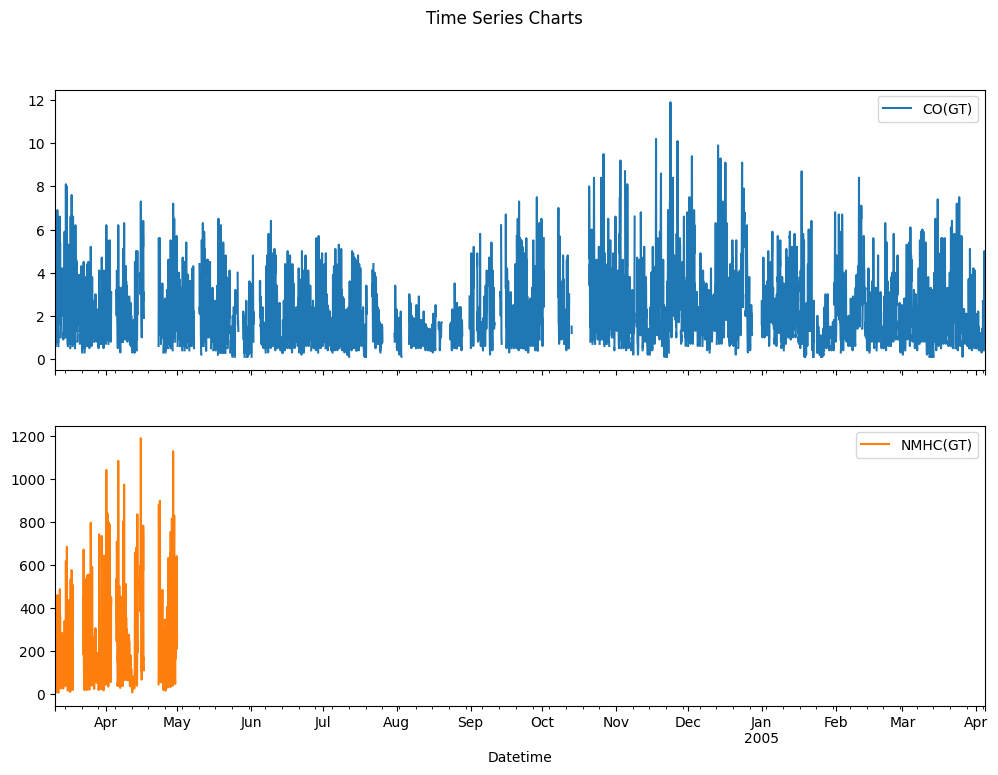

In [21]:
vars_to_plot = [
    "CO(GT)",
    "NMHC(GT)"
]

df_gt[vars_to_plot].plot(
    subplots=True,
    figsize=(12, 8),
    title="Time Series Charts"
)

In [22]:
# Because of the missing data for NMHC (GT), synthetic data must be made to make up for the data loss.
# Therefore existing GT data was used to impute data
# Before anything, more cleaning must be done

In [23]:
target = "NMHC(GT)"

print("Rows:", len(df_nick))
print("NaNs in target:", df_nick[target].isna().sum())
print("Count of -200 in target:", (df_nick[target] == -200).sum()) # sanity check
print("Target dtype:", df_nick[target].dtype)


Rows: 9357
NaNs in target: 8443
Count of -200 in target: 0
Target dtype: float64


<Axes: title={'center': 'NMHC(GT)'}, xlabel='Datetime'>

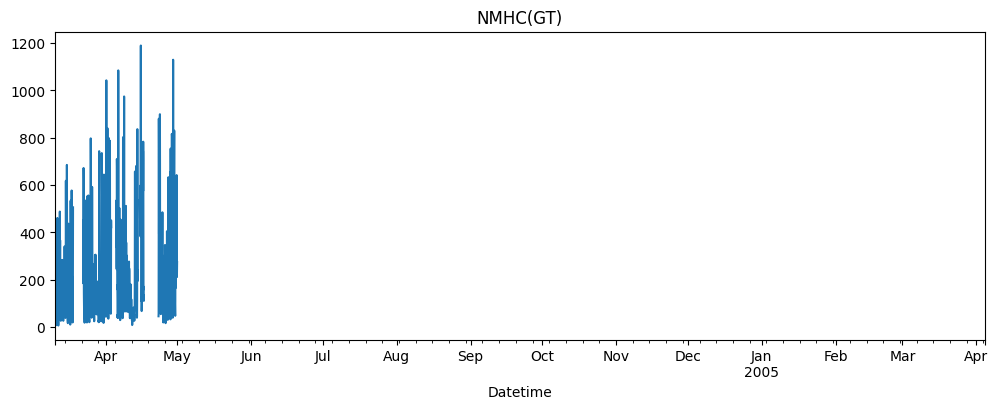

In [24]:
df_nick[target].plot(figsize=(12,4), title="NMHC(GT)")


In [25]:
# count NaNs per column
print("NaNs per column:\n", df_nick.isna().sum().sort_values(ascending=False).head(20))

# count -200 per column (if any)
print("\n-200 per column:\n", (df_nick == -200).sum().sort_values(ascending=False).head(20))


NaNs per column:
 NMHC(GT)         8443
CO(GT)           1683
PT08.S1(CO)       366
PT08.S2(NMHC)     366
T                 366
RH                366
AH                366
dtype: int64

-200 per column:
 CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
PT08.S2(NMHC)    0
T                0
RH               0
AH               0
dtype: int64


In [26]:
# create training data from existing data
target = "NMHC(GT)"

train = df_nick[df_nick[target].notna()]
missing = df_nick[df_nick[target].isna()]

In [27]:
# sanity check
print(type(df_nick.index))

# add time features
df_nick["hour"] = df_nick.index.hour
df_nick["dayofweek"] = df_nick.index.dayofweek
df_nick["month"] = df_nick.index.month

df_nick[["hour", "dayofweek", "month"]].head()

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


,hour,dayofweek,month
Datetime,,,
2004-03-10 18:00:00,18,2,3
2004-03-10 19:00:00,19,2,3
2004-03-10 20:00:00,20,2,3
2004-03-10 21:00:00,21,2,3
2004-03-10 22:00:00,22,2,3


In [28]:
# Since interpolation didnt work well with large data gaps, conditions will be put in place
# if gaps are <= 500, interpolation will be the method of choice to fill in missing data
# else, use model based imputation via randomforest

num_cols = [c for c in df_nick.columns if c not in ["hour","dayofweek","month"]]

na_counts = df_nick[num_cols].isna().sum().sort_values(ascending=False)

for target in na_counts[na_counts > 0].index:
    n_missing = int(na_counts[target])

    # interpolation
    if n_missing <= 500:
        df_nick[target] = df_nick[target].interpolate(method="time").ffill().bfill()
        print(f"{target}: interpolated ({n_missing} missing)")
        continue

    # model-based
    train = df_nick[df_nick[target].notna()]
    missing = df_nick[df_nick[target].isna()]

    X_train = train.drop(columns=[target])
    y_train = train[target]
    X_missing = missing.drop(columns=[target])

    model = Pipeline([
        ("imp", SimpleImputer(strategy="median")),
        ("rf", RandomForestRegressor(
            n_estimators=600,
            max_depth=16,
            min_samples_leaf=2,
            random_state=0,
            n_jobs=-1
        ))
    ])

    model.fit(X_train, y_train)
    df_nick.loc[missing.index, target] = model.predict(X_missing)
    
    # Prints which columns are being filled
    print(f"{target}: impute-baby! ({n_missing} missing)")

NMHC(GT): impute-baby! (8443 missing)
CO(GT): impute-baby! (1683 missing)
PT08.S1(CO): interpolated (366 missing)
PT08.S2(NMHC): interpolated (366 missing)
T: interpolated (366 missing)
RH: interpolated (366 missing)
AH: interpolated (366 missing)


array([<Axes: xlabel='Datetime'>, <Axes: xlabel='Datetime'>,
       <Axes: xlabel='Datetime'>, <Axes: xlabel='Datetime'>,
       <Axes: xlabel='Datetime'>, <Axes: xlabel='Datetime'>,
       <Axes: xlabel='Datetime'>], dtype=object)

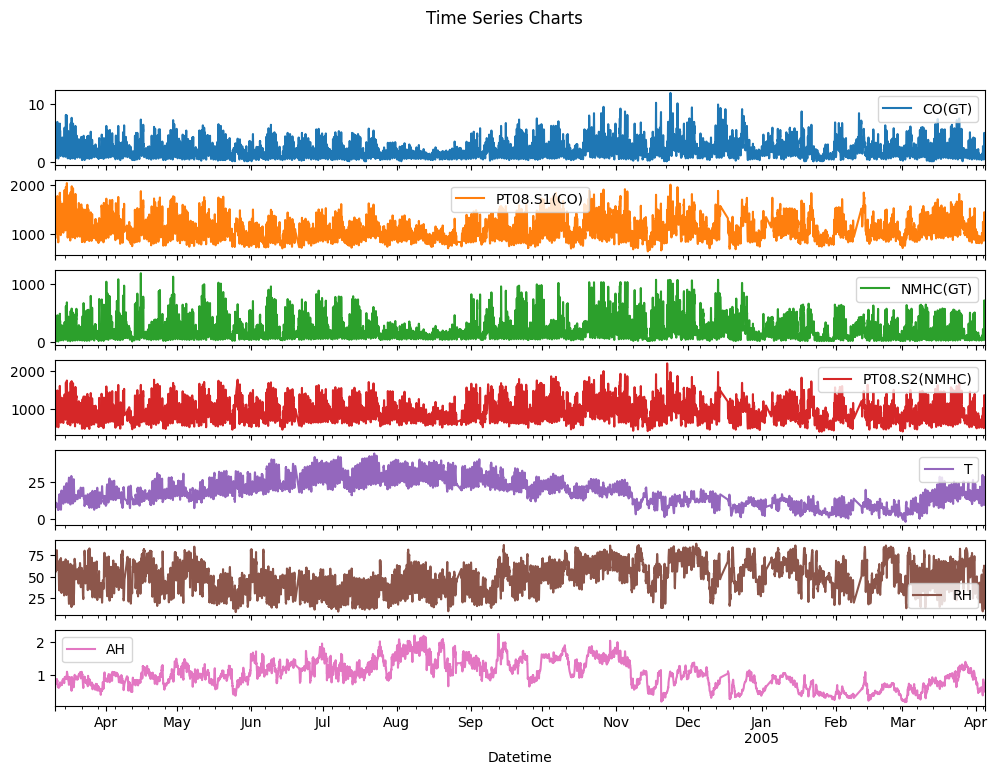

In [29]:
# check how it looks after interpolation and imputation
vars_to_plot = [
    "CO(GT)",
    "PT08.S1(CO)",
    "NMHC(GT)",
    "PT08.S2(NMHC)",
    "T",
    "RH",
    "AH"
]

df_nick[vars_to_plot].plot(
    subplots=True,
    figsize=(12, 8),
    title="Time Series Charts"
)

In [30]:
# Separating the data again but with better data
df_sensors = df_nick.drop(columns=['CO(GT)', 'NMHC(GT)'])
df_gt = df_nick.drop(columns=['PT08.S1(CO)', 'PT08.S2(NMHC)'])

In [31]:
# Save cleaned data as CSV

df_nick.to_csv("../../Data/CO_NMHC/CO_NMHC_Final.csv") # Cleaned dataset with time features
df_gt.to_csv('../../Data/CO_NMHC/GT.csv') # GT data
df_sensors.to_csv('../../Data/CO_NMHC/sensors.csv') # sensor data

In [50]:
# Tired of seeing my own name
df = df_nick
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),T,RH,AH,hour,dayofweek,month
Datetime,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,150.0,1046.0,13.6,48.9,0.7578,18,2,3
2004-03-10 19:00:00,2.0,1292.0,112.0,955.0,13.3,47.7,0.7255,19,2,3
2004-03-10 20:00:00,2.2,1402.0,88.0,939.0,11.9,54.0,0.7502,20,2,3
2004-03-10 21:00:00,2.2,1376.0,80.0,948.0,11.0,60.0,0.7867,21,2,3
2004-03-10 22:00:00,1.6,1272.0,51.0,836.0,11.2,59.6,0.7888,22,2,3


In [33]:
# Prepare for forcasting prediction

# Scale data for more accuate predictions
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numeric_cols = df.select_dtypes(include="number").columns

df_scaled = df.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [34]:
df_scaled.head()

,CO(GT),PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),T,RH,AH,hour,dayofweek,month
Datetime,,,,,,,,,,
2004-03-10 18:00:00,0.386559,1.177627,-0.319664,0.387741,-0.527644,-0.016947,-0.651002,0.939133,-0.504915,-0.962879
2004-03-10 19:00:00,-0.045412,0.865965,-0.528308,0.048002,-0.561807,-0.086741,-0.731314,1.083583,-0.504915,-0.962879
2004-03-10 20:00:00,0.098578,1.370125,-0.660083,-0.011733,-0.721236,0.279675,-0.669899,1.228033,-0.504915,-0.962879
2004-03-10 21:00:00,0.098578,1.250960,-0.704007,0.021868,-0.823727,0.628642,-0.579144,1.372483,-0.504915,-0.962879
2004-03-10 22:00:00,-0.333392,0.774299,-0.863235,-0.396273,-0.800951,0.605378,-0.573922,1.516933,-0.504915,-0.962879


In [35]:
df_scaled.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),T,RH,AH,hour,dayofweek,month
count,9.357000e+03,9.357000e+03,9.357000e+03,9.357000e+03,9.357000e+03,9.357000e+03,9.357000e+03,9.357000e+03,9.357000e+03,9.357000e+03
mean,9.719939e-17,-2.399610e-16,7.289954e-17,-8.504947e-17,-4.859970e-16,-1.063118e-16,4.859970e-17,-3.958217e-17,-5.904104e-17,7.289954e-17
std,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00
min,-1.413317e+00,-2.090246e+00,-1.104823e+00,-2.087504e+00,-2.292754e+00,-2.325948e+00,-2.075981e+00,-1.660966e+00,-1.504807e+00,-1.544617e+00
25%,-7.653619e-01,-7.565139e-01,-7.272161e-01,-7.696130e-01,-7.440119e-01,-7.788594e-01,-7.144059e-01,-9.387165e-01,-1.004861e+00,-9.628793e-01
50%,-1.894016e-01,-1.652716e-01,-3.001905e-01,-1.199528e-01,-7.213130e-02,2.376548e-02,-7.489351e-02,-7.201658e-02,-4.969005e-03,-9.027285e-02
75%,4.585537e-01,6.230513e-01,3.776448e-01,6.602795e-01,6.908518e-01,7.624130e-01,7.138053e-01,9.391333e-01,9.949231e-01,7.823336e-01
max,7.082097e+00,4.294253e+00,5.385091e+00,4.748353e+00,3.002577e+00,2.297869e+00,3.012022e+00,1.661383e+00,1.494869e+00,1.654940e+00


array([<Axes: xlabel='Datetime'>, <Axes: xlabel='Datetime'>,
       <Axes: xlabel='Datetime'>, <Axes: xlabel='Datetime'>,
       <Axes: xlabel='Datetime'>, <Axes: xlabel='Datetime'>,
       <Axes: xlabel='Datetime'>], dtype=object)

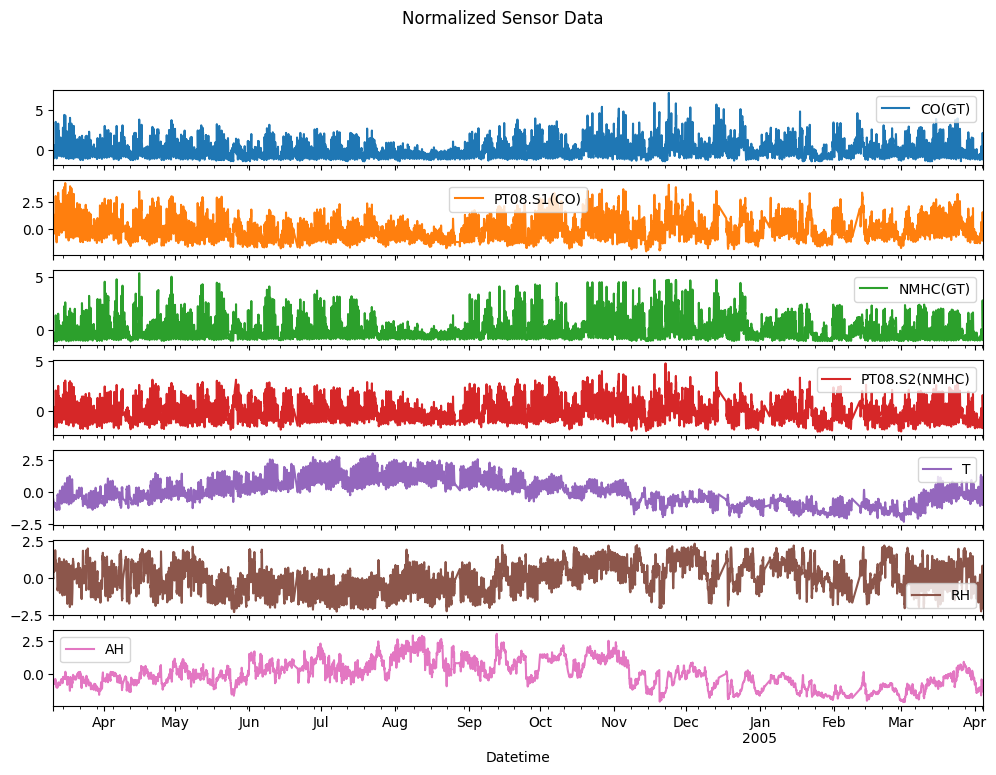

In [36]:
# see how it looks graphically
df_scaled[["CO(GT)", "PT08.S1(CO)", "NMHC(GT)", "PT08.S2(NMHC)","T","RH","AH"]].plot(
    subplots=True,
    figsize=(12,8),
    title="Normalized Sensor Data"
)

In [37]:
# Calculate drift. residual = scaled sensor - scaled gt
df_scaled["CO_residual"] = df_scaled["PT08.S1(CO)"] - df_scaled["CO(GT)"]
df_scaled["CO_residual_smooth"] = df_scaled["CO_residual"].rolling(72).mean()

df_scaled["NMHC_residual"] = df_scaled["PT08.S2(NMHC)"] - df_scaled["NMHC(GT)"]
df_scaled["NMHC_residual_smooth"] = df_scaled["NMHC_residual"].rolling(72).mean()



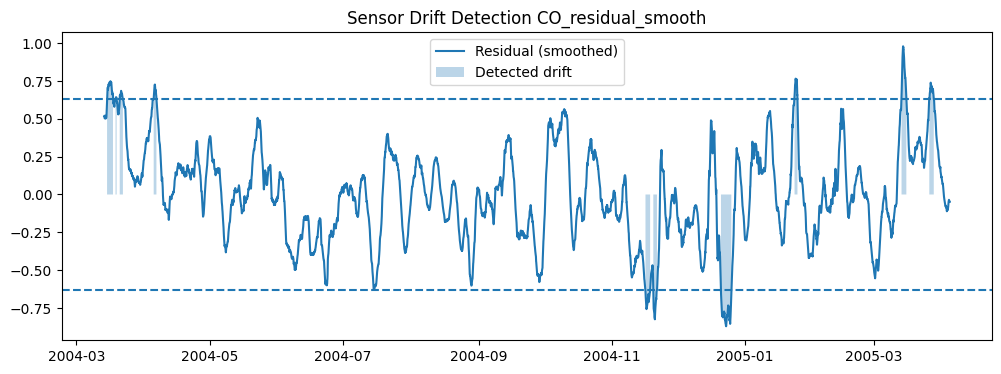

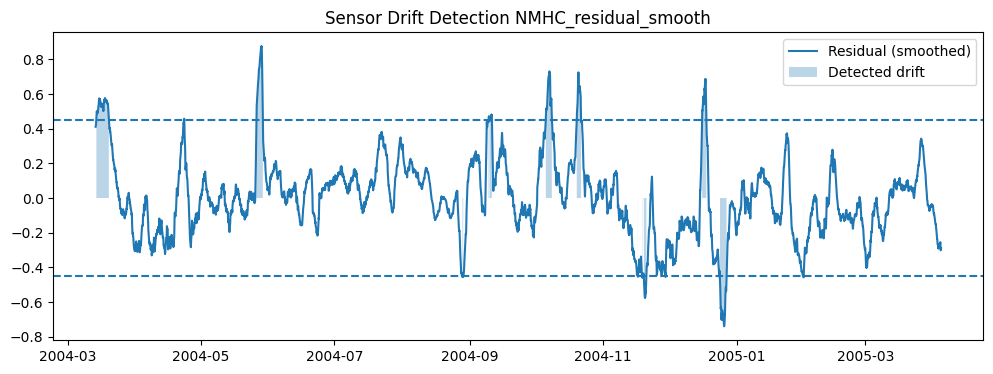

In [38]:
# plot drift detection
target = ("CO_residual_smooth","NMHC_residual_smooth")

for i in target:
    
    threshold = df_scaled[i].std() * 2
    df_scaled["drift_flag"] = df_scaled[i].abs() > threshold


    plt.figure(figsize=(12,4))
    
    plt.plot(df_scaled.index, df_scaled[i], label="Residual (smoothed)")
    
    plt.fill_between(
        df_scaled.index,
        df_scaled[i],
        where=df_scaled["drift_flag"],
        alpha=0.3,
        label="Detected drift"
    )
    
    plt.axhline(threshold, linestyle="--")
    plt.axhline(-threshold, linestyle="--")
    
    plt.legend()
    plt.title(f"Sensor Drift Detection {i}")
    plt.show()

In [39]:
sensor_pairs = {
    "PT08.S1(CO)": "CO(GT)",
    "PT08.S2(NMHC)": "NMHC(GT)"
}

for sensor, gt in sensor_pairs.items():
    residual_col = f"{sensor}_drift"
    smooth_col = f"{sensor}_drift_smooth"

    df_scaled[residual_col] = df_scaled[sensor] - df_scaled[gt]
    df_scaled[smooth_col] = df_scaled[residual_col].rolling(72).mean()


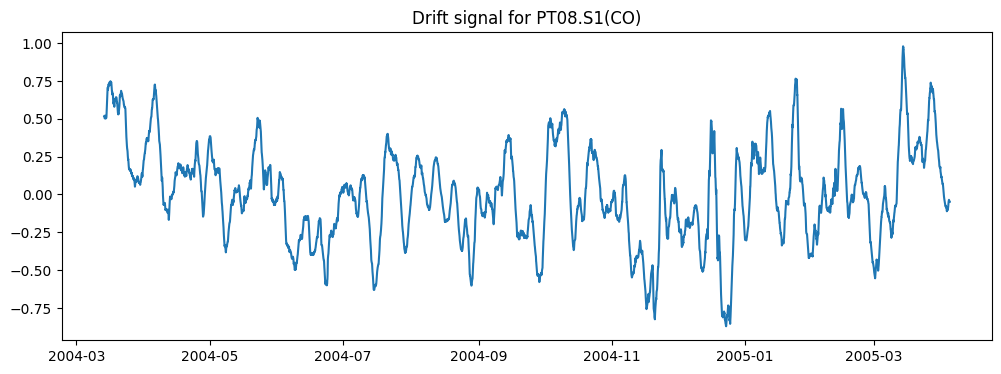

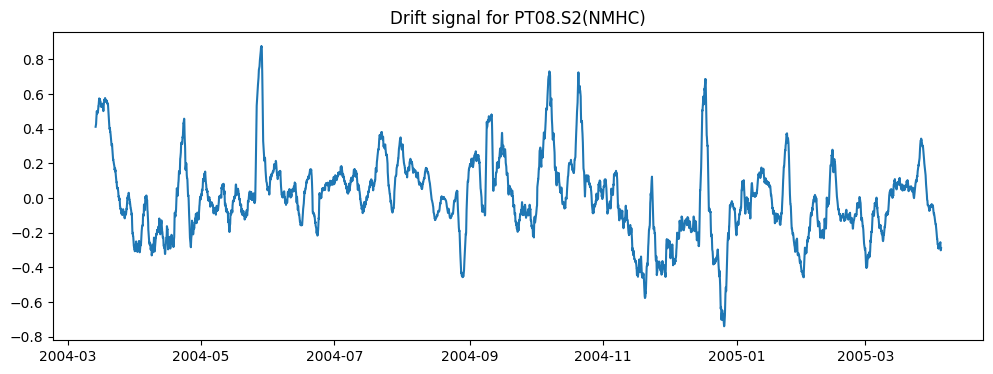

In [40]:
for sensor in sensor_pairs.keys():
    plt.figure(figsize=(12,4))
    plt.plot(df_scaled[f"{sensor}_drift_smooth"])
    plt.title(f"Drift signal for {sensor}")
    plt.show()


In [41]:
env_vars = ["T", "RH", "AH"]

for sensor in sensor_pairs.keys():
    drift_col = f"{sensor}_drift_smooth"

    print(f"\nCorrelation with drift for {sensor}:")
    print(df_scaled[[drift_col] + env_vars].corr()[drift_col].drop(drift_col))



Correlation with drift for PT08.S1(CO):
T     0.041871
RH    0.137686
AH    0.152577
Name: PT08.S1(CO)_drift_smooth, dtype: float64

Correlation with drift for PT08.S2(NMHC):
T     0.378860
RH   -0.085204
AH    0.378776
Name: PT08.S2(NMHC)_drift_smooth, dtype: float64


/var/folders/ts/33rvr9mx0yb7mq12ds2w0r9m0000gn/T/ipykernel_23535/649878540.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = df.resample("M").mean()
/opt/miniconda3/envs/msaai/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/ts/33rvr9mx0yb7mq12ds2w0r9m0000gn/T/ipykernel_23535/649878540.py:32: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_index = pd.date_range(


CO(GT) predictions: [np.float64(1.3393788695399882), np.float64(1.6979072181389265), np.float64(1.7823395178614039)]
NMHC(GT) predictions: [np.float64(129.57358091780839), np.float64(147.313527984386), np.float64(161.29393099914245)]


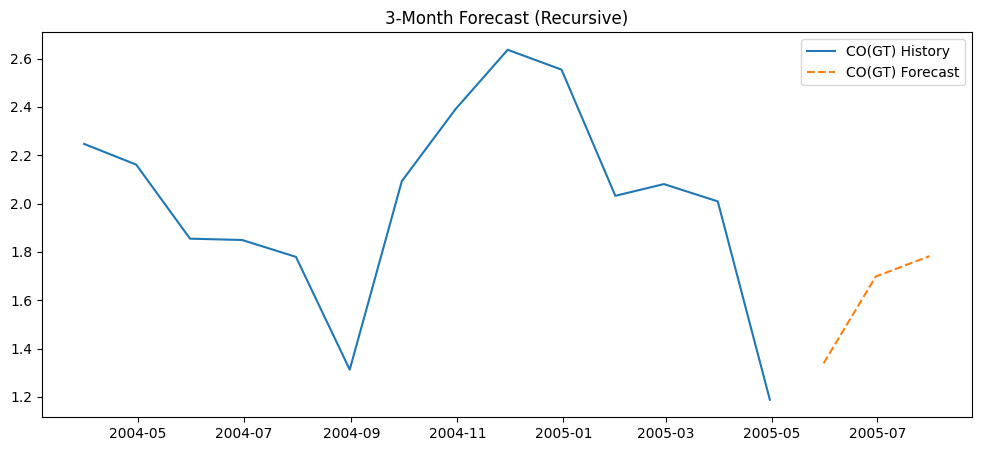

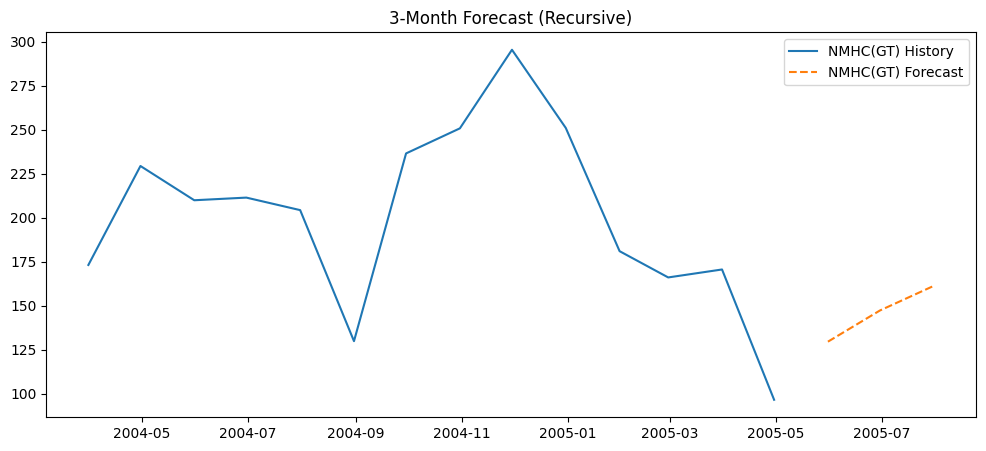

In [53]:
# monthly aggregation
monthly_df = df.resample("M").mean() # use df_scaled or df 

targets = ["CO(GT)", "NMHC(GT)"]
order = (2, 1, 2)
horizon = 3

all_predictions = {}

for target in targets:
    series = monthly_df[target].dropna()

    # recursive forecast: 1 month ahead, append prediction, repeat
    history = list(series.values)
    predictions = []

    for _ in range(horizon):
        model = ARIMA(history, order=order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(yhat)

    all_predictions[target] = {
        "series": series,
        "predictions": predictions
    }

    print(f"{target} predictions:", predictions)

# future index for 3 months
future_index = pd.date_range(
    monthly_df.index.max(),
    periods=horizon + 1,
    freq="M"
)[1:]

# plot both
for target in targets:
    series = all_predictions[target]["series"]
    preds = all_predictions[target]["predictions"]

    plt.figure(figsize=(12,5))
    plt.plot(series.index, series, label=f"{target} History")
    plt.plot(future_index, preds, "--", label=f"{target} Forecast")

    plt.legend()
    plt.title("3-Month Forecast (Recursive)")
    plt.show()


/var/folders/ts/33rvr9mx0yb7mq12ds2w0r9m0000gn/T/ipykernel_23535/211854424.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_df = df.resample("H").mean()


CO(GT) 24-hour predictions: [np.float64(2.089219433814291), np.float64(1.9149340530723296), np.float64(1.7714753787912463), np.float64(1.6723892511261738), np.float64(1.6092283181639624), np.float64(1.570713835259739), np.float64(1.547854759763295), np.float64(1.5345225623714058), np.float64(1.5268372278100908), np.float64(1.5224421447016074), np.float64(1.519942533757423), np.float64(1.5185262386093208), np.float64(1.5177257576111902), np.float64(1.5172739113974694), np.float64(1.5170189396343043), np.float64(1.5168750230076895), np.float64(1.5167936122538723), np.float64(1.5167472556668138), np.float64(1.5167210389942494), np.float64(1.5167054683624195), np.float64(1.5166970074341142), np.float64(1.5166913440702448), np.float64(1.5166873543118713), np.float64(1.5166843549967461)]
NMHC(GT) 24-hour predictions: [np.float64(220.15350528597213), np.float64(194.82280292662796), np.float64(173.89808834290298), np.float64(159.34510945742932), np.float64(149.934285369073), np.float64(144.075

/var/folders/ts/33rvr9mx0yb7mq12ds2w0r9m0000gn/T/ipykernel_23535/211854424.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  future_index = pd.date_range(
/var/folders/ts/33rvr9mx0yb7mq12ds2w0r9m0000gn/T/ipykernel_23535/211854424.py:47: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  plt.plot(series.last("7D").index, series.last("7D"), label=f"{target} History (last 7D)")


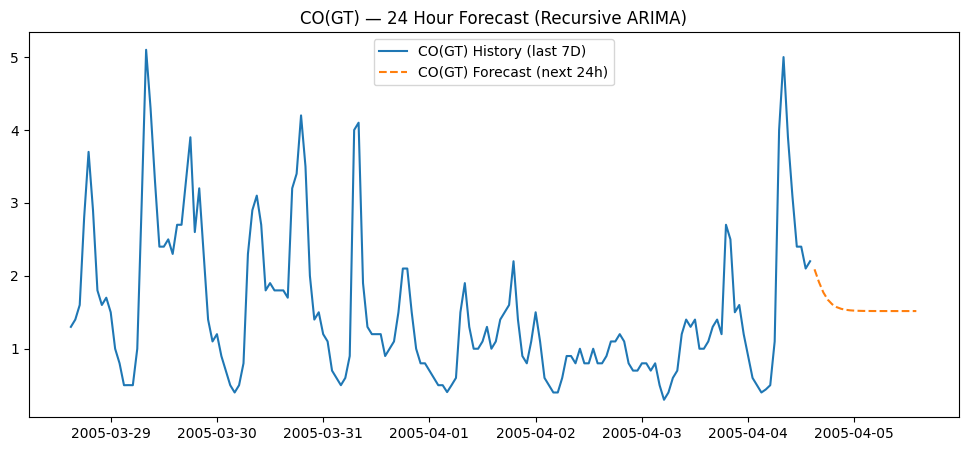

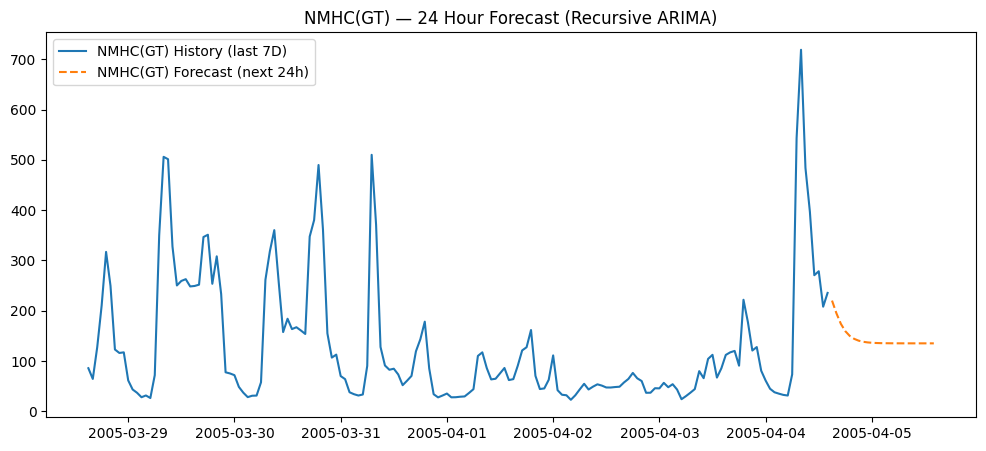

In [54]:

# hourly frequency
hourly_df = df.resample("H").mean()

targets = ["CO(GT)", "NMHC(GT)"]
order = (2, 1, 2)
horizon = 24  # 24 hours

all_predictions = {}

for target in targets:
    series = hourly_df[target].dropna()

    history = list(series.values)
    predictions = []

    for _ in range(horizon):
        model = ARIMA(history, order=order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(yhat)

    all_predictions[target] = {
        "series": series,
        "predictions": predictions
    }

    print(f"{target} 24-hour predictions:", predictions)

# future hourly index (next 24 hours)
future_index = pd.date_range(
    hourly_df.index.max(),
    periods=horizon + 1,
    freq="H"
)[1:]

# 3) plot (show last 7 days of history + next 24 hours forecast)
for target in targets:
    series = all_predictions[target]["series"]
    preds = all_predictions[target]["predictions"]

    plt.figure(figsize=(12,5))
    plt.plot(series.last("7D").index, series.last("7D"), label=f"{target} History (last 7D)")
    plt.plot(future_index, preds, "--", label=f"{target} Forecast (next 24h)")
    plt.legend()
    plt.title(f"{target} — 24 Hour Forecast (Recursive ARIMA)")
    plt.show()
